In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import spearmanr
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）


In [2]:
df = pd.read_csv(r"OriginData.csv", header=0, index_col=0)
df


D:\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,SecuCode,TradingDay,PrevClosePrice,OpenPrice,HighPrice,LowPrice,ClosePrice,TurnoverVolume,TurnoverValue,TurnoverDeals,day_yield
0,1965,2018-01-02,13.85,13.60,14.36,13.34,13.68,71839030.0,9.955184e+08,69807.0,-0.0123
1,603937,2018-01-02,26.24,26.00,26.99,25.50,26.72,22832837.0,6.022211e+08,30242.0,0.0183
2,300716,2018-01-02,25.92,26.44,27.30,26.10,26.80,5067939.0,1.357118e+08,9094.0,0.0340
3,600933,2018-01-02,15.37,15.39,15.47,15.21,15.40,6626351.0,1.017327e+08,6703.0,0.0020
4,603277,2018-01-02,18.58,18.54,18.77,18.41,18.61,1722912.0,3.200773e+07,2505.0,0.0016
...,...,...,...,...,...,...,...,...,...,...,...
3774178,2013,2022-03-02,12.88,12.88,12.90,12.36,12.47,87073949.0,1.088138e+09,105705.0,-0.0318
3774179,2014,2022-03-02,9.24,9.28,9.34,9.21,9.32,3605187.0,3.348938e+07,8162.0,0.0087
3774180,2015,2022-03-02,16.93,16.80,16.91,16.48,16.58,11236730.0,1.867256e+08,14791.0,-0.0207
3774181,2016,2022-03-02,5.68,5.68,5.75,5.64,5.75,3355602.0,1.913690e+07,4818.0,0.0123


In [3]:
VolumeChange = df.pivot_table("TurnoverVolume", index = "TradingDay", columns = "SecuCode")
VolumeChange = VolumeChange.pct_change().iloc[1:,:]
VolumeChange


SecuCode,1,2,4,5,6,7,8,9,10,11,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
TradingDay,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.423188,-0.053499,2.001591,-0.049605,NaN,NaN,-0.155534,0.198345,0.325882,-0.061270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,-0.374005,-0.182084,-0.226371,-0.355650,NaN,NaN,0.089379,1.035013,-0.170558,-0.314125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,-0.347368,0.593507,-0.281735,0.945371,NaN,NaN,0.091950,-0.446930,0.561768,4.727772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,0.783523,-0.014611,-0.312924,-0.193644,NaN,NaN,-0.401757,-0.087988,1.751939,-0.164475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,-0.377220,-0.424087,-0.233143,0.568630,NaN,NaN,0.380956,-0.305262,-0.039423,-0.427488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,0.493203,-0.040488,0.746822,2.813223,0.914491,1.372974,0.012372,-0.110031,0.094373,1.636441,...,0.635014,0.349670,0.801230,0.713412,0.707560,4.064311,0.044792,1.050600,0.386373,0.743909
2022-02-25,-0.451398,0.016112,0.013819,-0.531144,-0.544611,-0.505962,-0.513237,-0.367104,-0.394565,-0.465374,...,-0.150448,-0.231594,-0.375581,-0.247745,-0.377243,1.010929,-0.513460,-0.637404,-0.120107,-0.353083
2022-02-28,-0.003313,-0.035813,-0.369186,-0.125470,-0.006790,0.792717,-0.184029,0.421908,0.026623,-0.194217,...,-0.207729,-0.386031,0.101941,-0.112060,0.029055,-0.413052,0.091335,-0.242110,-0.484404,0.300133


In [4]:
ret = df.pivot_table("day_yield", index = "TradingDay", columns = "SecuCode")
ret = ret.iloc[1:,:]
ret


SecuCode,1,2,4,5,6,7,8,9,10,11,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
TradingDay,,,,,,,,,,,,,,,,,,,,,
2018-01-03,-0.0270,-0.0071,0.0654,-0.0116,0.0000,0.0000,-0.0023,0.0137,0.0091,0.0035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,-0.0060,0.0244,-0.0235,0.0047,0.0000,0.0000,-0.0080,0.0296,-0.0090,0.0006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,0.0038,0.0495,-0.0026,0.0117,0.0000,0.0000,-0.0150,-0.0118,0.0292,0.0466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,-0.0256,0.0354,-0.0147,0.0069,0.0000,0.0000,-0.0094,-0.0040,0.0993,-0.0039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09,0.0093,-0.0042,0.0079,0.0092,0.0000,0.0000,0.0024,-0.0053,-0.0306,-0.0073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,-0.0173,-0.0207,-0.0400,-0.0400,-0.0310,-0.0045,-0.0468,-0.0259,-0.0315,-0.0354,...,-0.0362,-0.0287,-0.0184,-0.0306,-0.0464,0.0999,-0.0250,-0.0518,-0.0485,0.0280
2022-02-25,-0.0006,-0.0156,0.0547,0.0185,0.0000,0.0000,-0.0175,0.0057,0.0000,0.0028,...,0.0313,0.0310,-0.0015,0.0138,0.0189,0.0345,0.0046,-0.0043,0.0056,-0.0093
2022-02-28,-0.0094,-0.0169,-0.0092,0.0000,-0.0069,-0.0501,-0.0286,-0.0171,-0.0108,-0.0101,...,-0.0145,-0.0072,-0.0088,0.0169,-0.0116,-0.0497,-0.0117,-0.0193,0.0012,0.0338


In [5]:
# 因子计算，跑一次要好久，所以注释掉了
# window = 15
# cols = len(ret.columns)
# rows = len(ret)
# factor = pd.DataFrame(np.empty(rows *cols).reshape(rows, cols),
#                     index=ret.index,
#                     columns=ret.columns)
# print("Rows:", end=" ")
# for i in range(window, rows + 1):
#     print("%d" %i, end=" ")
#     for j in range(0, cols):
#         A = VolumeChange.iloc[i - window: i, j]
#         B = ret.iloc[i - window: i, j]
#         factor.iloc[i - 1, j] = A.corr(B)

# factor.to_csv("factor.csv")
# factor


In [6]:
factor = pd.read_csv(r"factor.csv", header=0, index_col=0)
factor


,1,2,4,5,6,7,8,9,10,11,...,605507,605555,605566,605567,605577,605580,605588,605589,605598,605599
TradingDay,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-24,-0.410465,0.221099,0.329951,-0.530692,-0.015276,-0.568145,0.394570,0.718903,0.637042,-0.353620,...,-0.575854,-0.062961,-0.409655,0.209478,0.130967,0.888108,0.144159,-0.353842,0.690051,0.789862
2022-02-25,-0.221108,0.217302,0.328725,-0.540470,0.029696,-0.513165,0.429764,0.702584,0.640657,-0.317217,...,-0.558987,-0.131888,-0.315625,0.170786,0.114650,0.914399,0.178221,-0.330958,0.698146,0.812628
2022-02-28,-0.210859,0.223749,0.354353,-0.535473,-0.008777,-0.568990,0.475131,0.659626,0.670185,-0.387450,...,-0.597235,-0.054731,-0.420538,0.141173,-0.350472,0.896399,0.315521,-0.268930,0.393509,0.618189


In [7]:
FactorTailMean = factor.iloc[-16:-1, :].dropna(axis=1).mean()
FactorTailMean


1        -0.055843
2         0.115041
4         0.008635
5        -0.177781
6        -0.012910
            ...   
605580    0.067948
605588   -0.346683
605589    0.000634
605598    0.575794
605599    0.681265
Length: 4211, dtype: float64

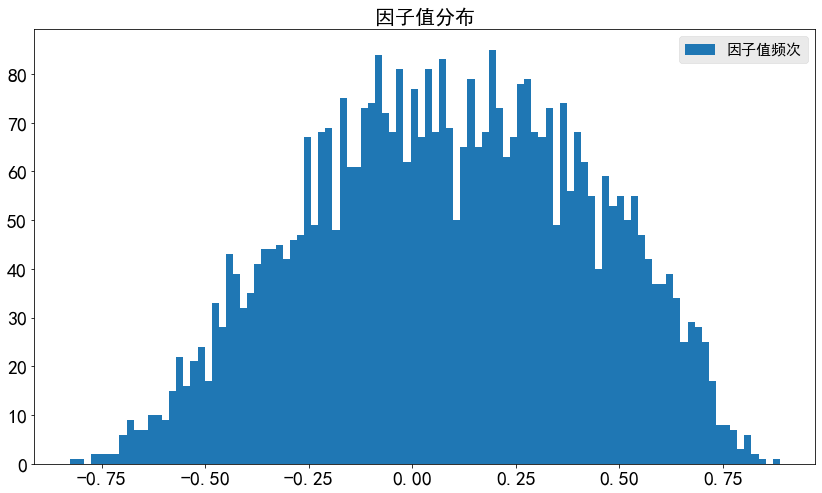

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.style.use("ggplot") # "bmh" "ggplot" "Solarize_Light2"
ax.hist(FactorTailMean, bins=100, label='因子值频次', linewidth=0.8, alpha=1)
ax.set_title('因子值分布', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.legend(loc='upper right', fontsize=15)
# plt.savefig(r'X.svg')
plt.show()


In [9]:
window = 15
PartRet1 = []
PartRet2 = []
PartRet3 = []
PartRet4 = []
PartRet5 = []
for i in range(window, len(factor)):
    FactorSort = factor.iloc[i-1, :].dropna().sort_values()
    RetDaily = pd.Series(ret.iloc[i, :], index = list(map(int, FactorSort.index))) # 将index生成的string转换成int后，对ret进行排序
    part = int(len(RetDaily) / 5)
    PartRet1.append(RetDaily[0: part].mean())
    PartRet2.append(RetDaily[part: 2 * part].mean())
    PartRet3.append(RetDaily[2 * part: 3 * part].mean())
    PartRet4.append(RetDaily[3 * part: 4 * part].mean())
    PartRet5.append(RetDaily[4 * part:].mean())


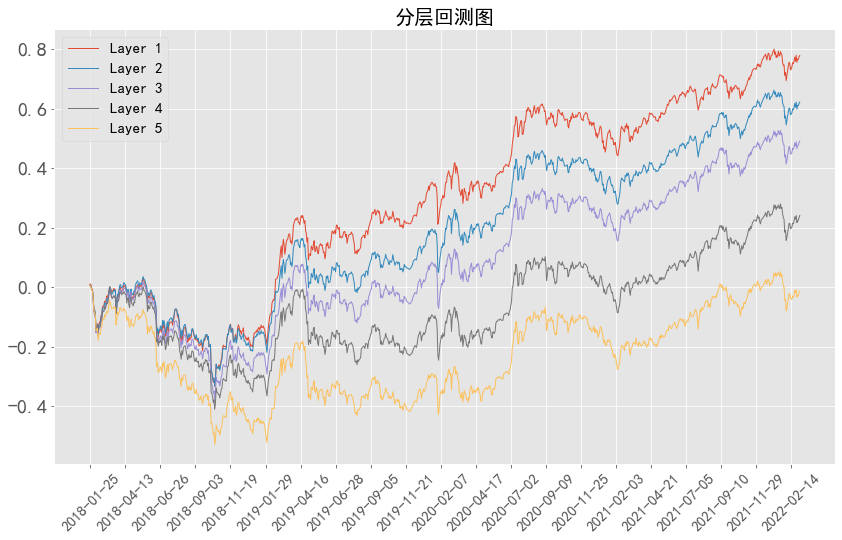

In [10]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.style.use("ggplot")  # "bmh" "ggplot"
ax.plot(pd.DataFrame(np.cumsum(PartRet1)).set_index(
    factor.index[window:, ]), linewidth=1, alpha=1, label="Layer 1")
ax.plot(pd.DataFrame(np.cumsum(PartRet2)).set_index(
    factor.index[window:, ]), linewidth=1, alpha=1, label="Layer 2")
ax.plot(pd.DataFrame(np.cumsum(PartRet3)).set_index(factor.index[window:,]), linewidth=1, alpha=1, label = "Layer 3")
ax.plot(pd.DataFrame(np.cumsum(PartRet4)).set_index(factor.index[window:,]), linewidth=1, alpha=1, label = "Layer 4")
ax.plot(pd.DataFrame(np.cumsum(PartRet5)).set_index(factor.index[window:,]), linewidth=1, alpha=1, label="Layer 5")
ax.set_title('分层回测图', fontsize=20)
plt.xticks(
    range(1, len(factor.index[window:, ]), 49), rotation=45,  fontsize=15)
plt.yticks(fontsize=20)
ax.legend(loc='upper left', fontsize=15)
# plt.savefig(r'X.svg')
plt.show()


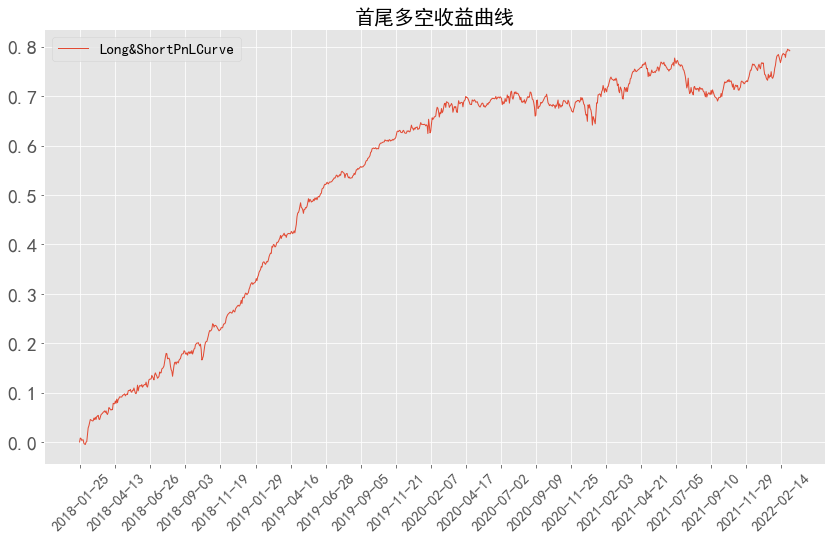

In [11]:
LongShortPnL = pd.DataFrame(np.array(np.cumsum(
    PartRet1)) - np.array(np.cumsum(PartRet5))).set_index(factor.index[window:, ])
fig, ax = plt.subplots(figsize=(14, 8))
plt.style.use("ggplot") # "bmh" "ggplot"
ax.plot(LongShortPnL, linewidth=1, alpha=1, label = "Long&ShortPnLCurve")
ax.set_title('首尾多空收益曲线', fontsize=20)
plt.xticks(range(1, len(LongShortPnL.index), 49), rotation = 45,fontsize=15)
plt.yticks(fontsize=20)
ax.legend(loc='upper left', fontsize=15)
# plt.savefig(r'X.svg')
plt.show()


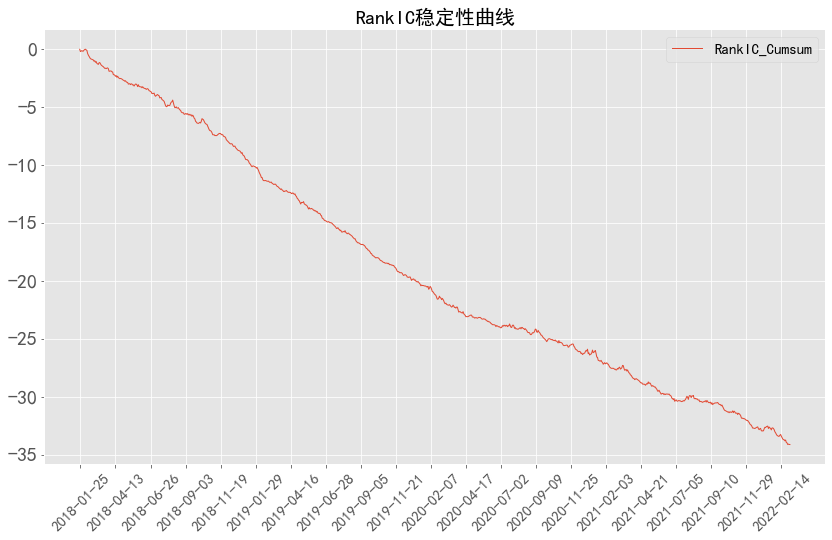

In [12]:
DailyRankIC = []
for i in range(window, len(factor)):
    FactorSort = factor.iloc[i-1, :].dropna().sort_values()
    RetDaily = pd.Series(ret.iloc[i, :],index=list(map(int, FactorSort.index)))# 将index生成的string转换成int后，对ret进行排序
    DailyRankIC.append(spearmanr(FactorSort, RetDaily)[0])

RankIC_Cumsum = pd.DataFrame(np.array(np.cumsum(DailyRankIC))).set_index(factor.index[window:,])
fig, ax = plt.subplots(figsize=(14, 8))
plt.style.use("ggplot")  # "bmh" "ggplot"
ax.plot(RankIC_Cumsum, linewidth=1, alpha=1, label="RankIC_Cumsum")
ax.set_title('RankIC稳定性曲线', fontsize=20)
plt.xticks(range(1, len(LongShortPnL.index), 49), rotation=45, fontsize=15)
plt.yticks(fontsize=20)
ax.legend(loc='upper right', fontsize=15)
# plt.savefig(r'X.svg')
plt.show()


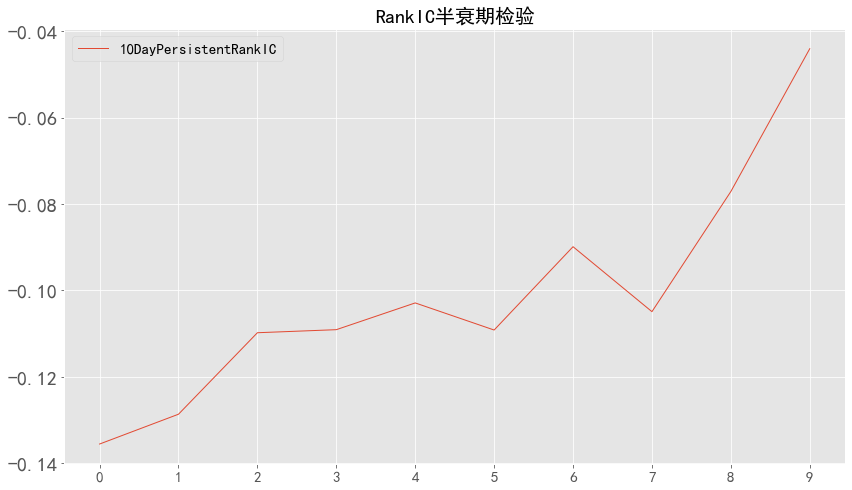

In [18]:
PersistentRankIC = []
a = 916
FactorSort = factor.iloc[a - 1, :].dropna().sort_values()
for i in range(0, 10):
    RetDaily = pd.Series(ret.iloc[a: a + i + 1, :].sum(),index=list(map(int, FactorSort.index)))
    PersistentRankIC.append(spearmanr(FactorSort, RetDaily)[0])

fig, ax = plt.subplots(figsize=(14, 8))
plt.style.use("ggplot")  # "bmh" "ggplot"
ax.plot(np.array(PersistentRankIC) , linewidth=1, alpha=1, label="10DayPersistentRankIC")
ax.set_title('RankIC半衰期检验', fontsize=20)
plt.xticks(range(0, 10), fontsize=15)
plt.yticks(fontsize=20)
ax.legend(loc='upper left', fontsize=15)
# plt.savefig(r'X.svg')
plt.show()
